In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("diamonds")

In [3]:
df.select_dtypes(include=["float64","int64"])

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.dropna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df["table"]

In [7]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

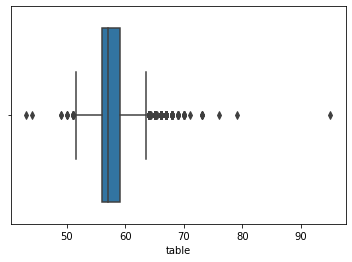

In [8]:
sns.boxplot(x=df_table)

In [9]:
 Q1 = df_table.quantile(0.25)

In [10]:
Q3 = df_table.quantile(0.75)

In [11]:
IQR = Q3-Q1

In [12]:
Q1

56.0

In [13]:
Q3

59.0

In [14]:
alt_sinir = Q1 - 1.5*IQR

In [15]:
ust_sinir = Q3 + 1.5*IQR

In [16]:
(df_table<alt_sinir) | (df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [17]:
aykırı_tf=(df_table<alt_sinir)

In [18]:
aykırı_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [20]:
df_table[aykırı_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [21]:
import pandas as pd

In [22]:
df_table = pd.DataFrame(df_table)

In [23]:
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [24]:
df_table.shape

(53940, 1)

In [25]:
t_df = df_table[~(((df_table < alt_sinir) | (df_table > ust_sinir))).any(axis=1)]

In [26]:
t_df.shape

(53335, 1)

Ortalama ile doldurma

In [27]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [29]:
df_table[aykırı_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [30]:
df_table.mean()

table    57.457184
dtype: float64

In [31]:
df_table[aykırı_tf] = df_table.mean()

In [32]:
df_table[aykırı_tf]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


Baskılama Yöntemi

In [33]:
df = sns.load_dataset("diamonds")

In [34]:
df = df.select_dtypes(include=["float64","int64"])

In [35]:
df_table = df["table"]

In [36]:
alt_sinir

51.5

In [37]:
df_table[aykırı_tf] = alt_sinir

C:\Users\sl\AppData\Local\Temp\ipykernel_7424\2941841070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf] = alt_sinir


In [38]:
df_table[aykırı_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [39]:
import seaborn as sns

In [40]:
diamonds = sns.load_dataset("diamonds")

In [41]:
diamonds = diamonds.select_dtypes(include=["float64","int64"])

In [42]:
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [43]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [44]:
clf = LocalOutlierFactor(n_neighbors= 20, contamination=0.1)

In [45]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [46]:
df_scores = clf.negative_outlier_factor_

In [47]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [48]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [49]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [50]:
esik_deger = np.sort(df_scores)[13]

In [51]:
aykiri_tf = df_scores > esik_deger

In [52]:
yeni_tf = df[df_scores > esik_deger]

In [53]:
yeni_tf

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [55]:
baski_deger = df[df_scores == esik_deger]

In [56]:
aykirilar = df[~aykiri_tf]

In [57]:
res = aykirilar.to_records(index = False)

In [58]:
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [59]:
res[:] = baski_deger.to_records(index = False)

In [60]:
df[~aykiri_tf] = pd.DataFrame(res , index=df[~aykiri_tf].index)

In [61]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


In [62]:
df.apply(lambda x : x.fillna(x.mean()),axis= 0 )

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
!pip install missingno

In [64]:
import missingno as msn

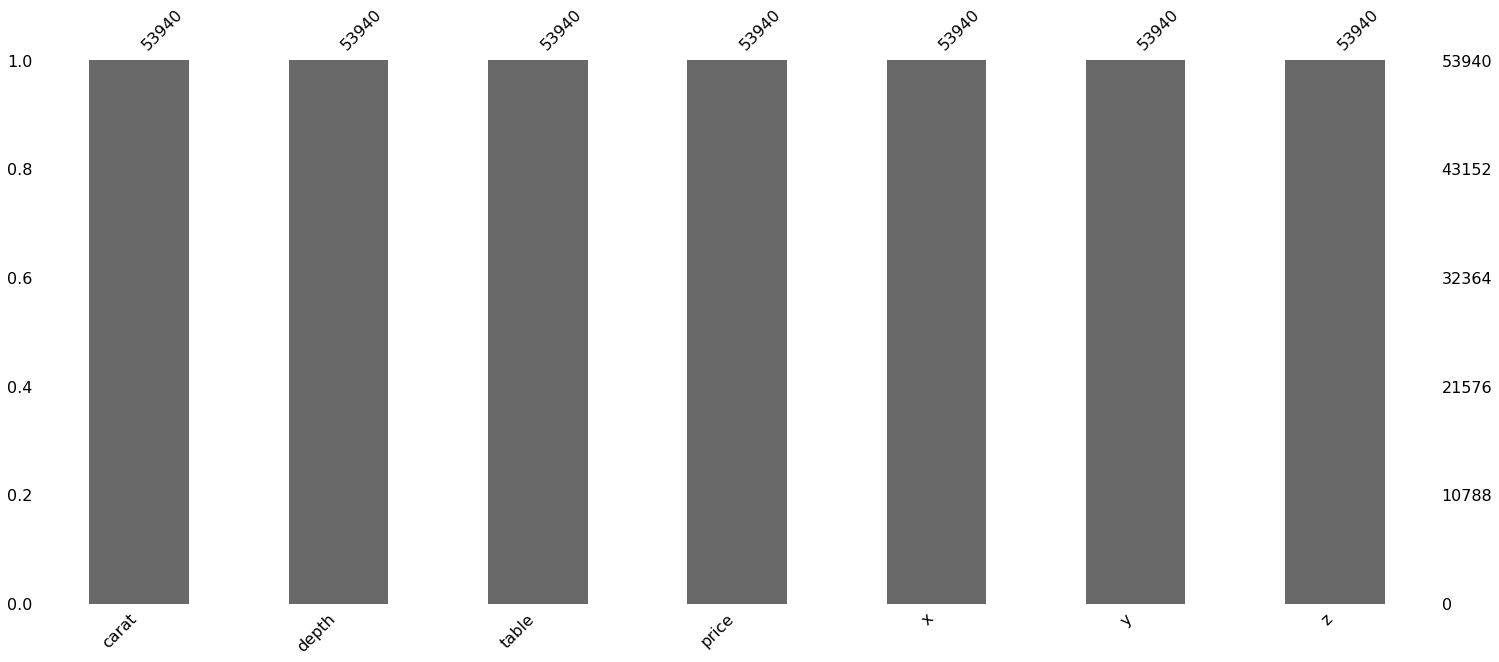

In [65]:
msn.bar(df);

In [66]:
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NAN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1": V1, "V2" : V2 , "V3" : V3})

In [67]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [68]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

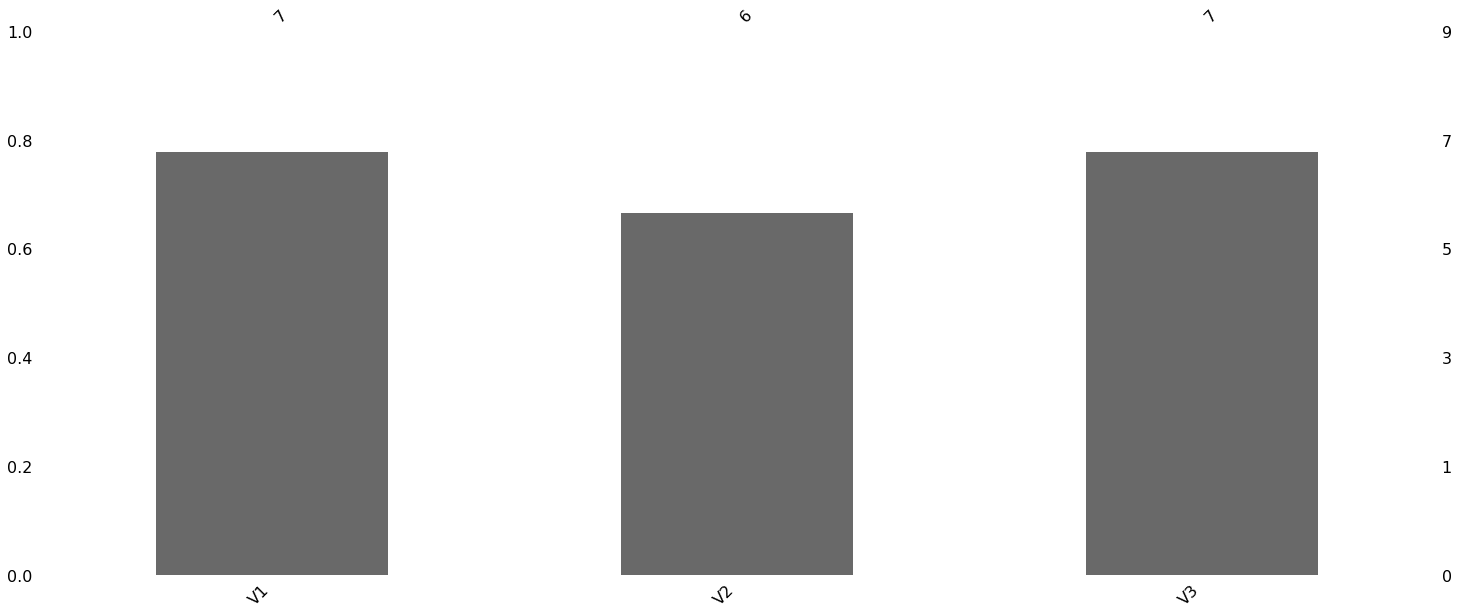

In [69]:
msn.bar(df);

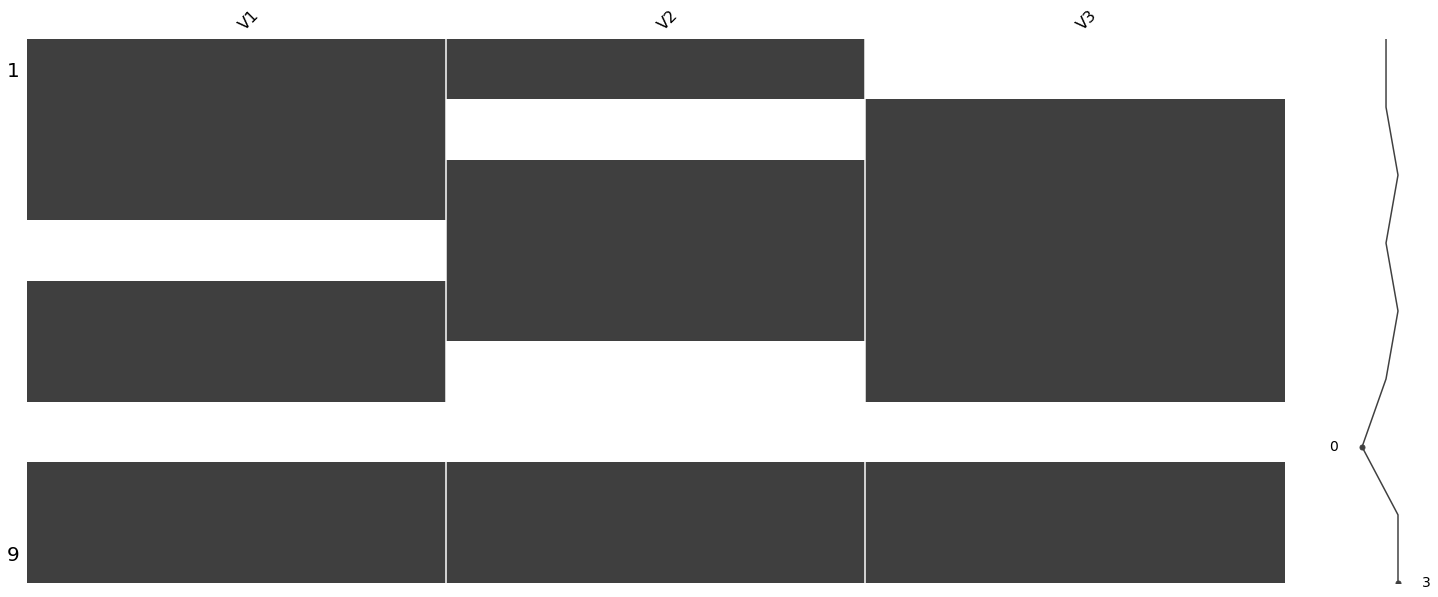

In [70]:
msn.matrix(df);

In [71]:
df = sns.load_dataset("planets")

In [72]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [73]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

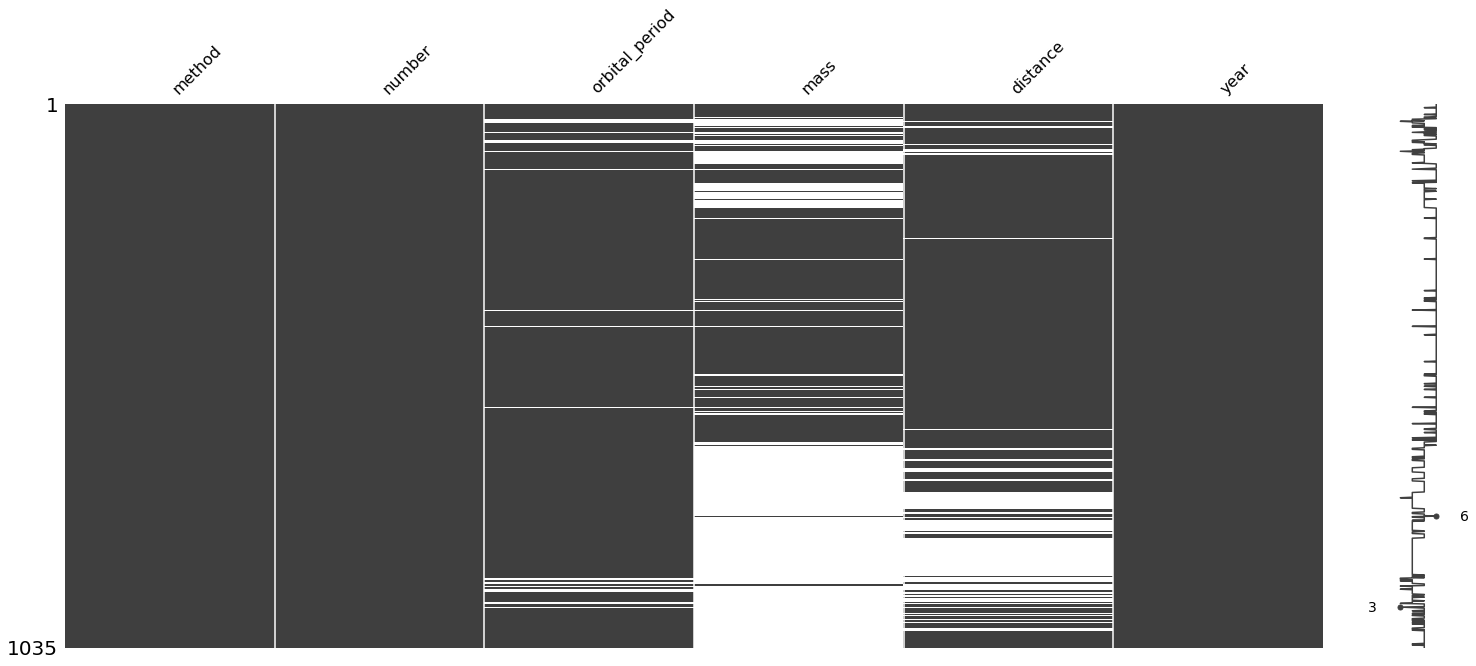

In [74]:
msn.matrix(df);

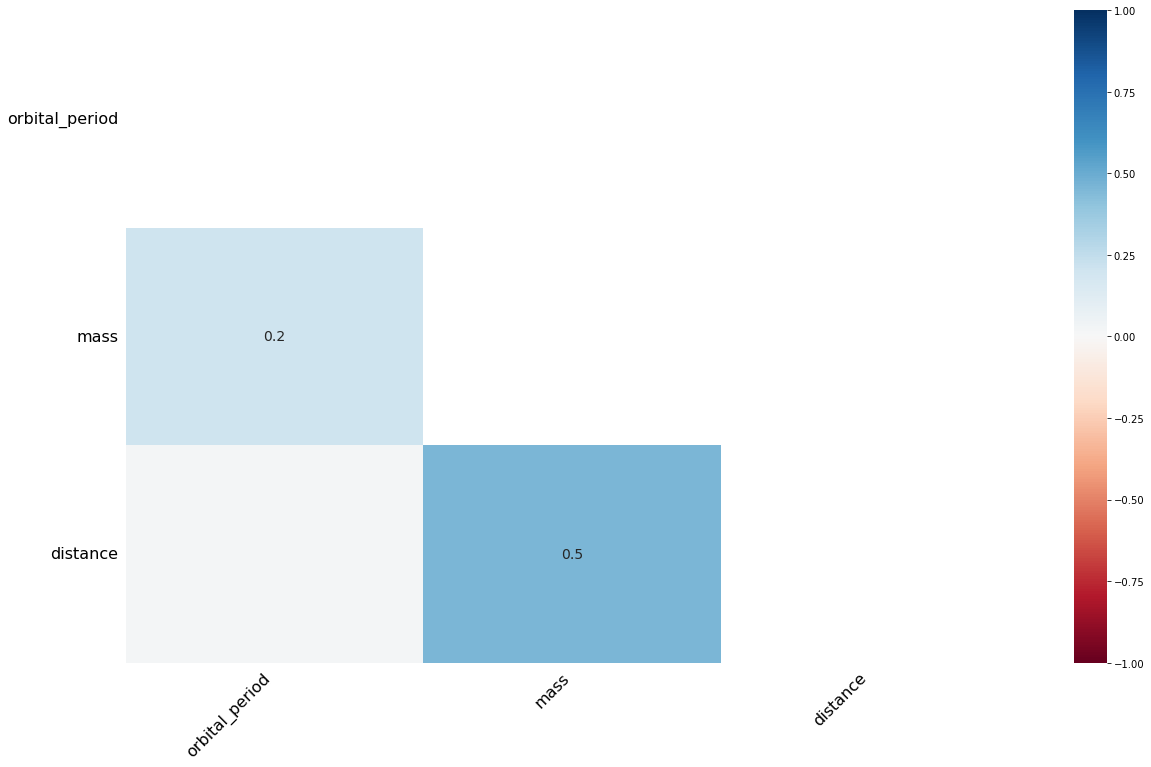

In [75]:
msn.heatmap(df);

In [76]:
df.dropna(how = "all")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [77]:
df.dropna(axis = 1 , how = "all")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [78]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [79]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["float64","int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [80]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [81]:
pip install ycimpute==0.1.1

Note: you may need to restart the kernel to use updated packages.


In [82]:
from ycimpute.imputer import knnimput

In [83]:
var_names = list(df)

In [84]:
n_df = np.array(df)

In [85]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [86]:
import numpy as np
n_df = np.array(df)

In [87]:
n_df[:10][:2]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833]])

In [88]:
n_df.shape

(891, 6)

In [89]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.070
Imputing row 101/891 with 0 missing, elapsed time: 0.070
Imputing row 201/891 with 0 missing, elapsed time: 0.070
Imputing row 301/891 with 1 missing, elapsed time: 0.070
Imputing row 401/891 with 0 missing, elapsed time: 0.070
Imputing row 501/891 with 0 missing, elapsed time: 0.070
Imputing row 601/891 with 0 missing, elapsed time: 0.070
Imputing row 701/891 with 0 missing, elapsed time: 0.070
Imputing row 801/891 with 0 missing, elapsed time: 0.070


In [90]:
dff = pd.DataFrame(dff,columns= var_names)

In [91]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [92]:
#random forest

In [93]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,22.469024,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [94]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["float64","int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [95]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [96]:
var_names = list(df)

In [97]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [98]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

In [99]:
dff = pd.DataFrame(dff,columns= var_names)

In [100]:
from ycimpute.imputer import EM

In [101]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["float64","int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [102]:
from ycimpute.imputer import EM

In [103]:
var_names = list(df)

In [104]:
import numpy as np
n_df = np.array(df)

In [105]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [106]:
dff = EM().complete(n_df)

In [107]:
dff = pd.DataFrame(dff,columns=var_names)

In [108]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [109]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame({"V1" : V1 , "V2" : V2 , "V3" : V3})
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [110]:
from sklearn import preprocessing

In [111]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [112]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

In [113]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [114]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [115]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [116]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [117]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [118]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [119]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [120]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [121]:
df["yeni_aday"] = np.where(df["day"].str.contains("Sun"),1,0)

In [122]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_aday
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [123]:
lbe = LabelEncoder()

In [124]:
LabelEncoder().fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [125]:
#cok dikkat

In [129]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_aday
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [130]:
df_one_hut = pd.get_dummies(df,columns = ["sex"],prefix_sep="sex")  

In [131]:
df_one_hut

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_aday,sexsexMale,sexsexFemale
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,0,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0,1,0


In [132]:
df_one_hut = pd.get_dummies(df,columns = ["day"],prefix_sep="day")  

In [133]:
df_one_hut

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_aday,daydayThur,daydayFri,daydaySat,daydaySun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0


In [171]:
import numpy as np
import pandas as pd

In [139]:
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame({"V1" : V1,"V2" : V2, "V3" : V3})

In [140]:
df = df.astype(float)

In [141]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [142]:
from sklearn import preprocessing

In [143]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [146]:
#Normalizasyom
"""değişkenin değerlerini 0 ila 1 arasına normal etmek"""

'değişkenin değerlerini 0 ila 1 arasına normal etmek'

In [147]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [148]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [149]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [150]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [152]:
binarizer = preprocessing.Binarizer(threshold=5).fit(df)

In [155]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [154]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [156]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

In [158]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
df["yeni_sex"] = df["sex"].cat.codes

In [160]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [162]:
df.drop("yeni_sex",axis=1,inplace= True)

In [163]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [164]:
lbe = preprocessing.LabelEncoder()

In [165]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [166]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [167]:
df["yeni_day"] =lbe.fit_transform(df["day"])

In [169]:
df.drop(columns="yeni_day",axis=1,inplace=True)

In [170]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [176]:
df["yeni_gun"] = np.where(df["day"].str.contains("Sun"),1,0)

In [177]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [178]:
lbe = preprocessing.LabelEncoder()

In [179]:
df["daha_yeni"] = lbe.fit_transform(df["day"])

In [180]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_gun,daha_yeni
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1


In [181]:
df_one_hot = df.copy()

In [182]:
pd.get_dummies(df_one_hot,columns= ["sex"],prefix_sep= ["sex"]).head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_gun,daha_yeni,sexsexMale,sexsexFemale
0,16.99,1.01,No,Sun,Dinner,2,0,1,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,2,0,1


In [184]:
df.drop(columns="yeni_sex",axis= 1,inplace= True)

In [200]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

In [201]:
dff = df.select_dtypes(include=["float64","int64"])

In [202]:
dff

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [208]:
est = preprocessing.KBinsDiscretizer(n_bins=[3,2,2],encode="ordinal",strategy="quantile").fit(dff)

In [210]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [211]:
df["yeni_değişken"] = df.index

In [212]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_değişken
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,240
241,22.67,2.00,Male,Yes,Sat,Dinner,2,241
242,17.82,1.75,Male,No,Sat,Dinner,2,242


In [213]:
df["yeni_değişken"] = df["yeni_değişken"] + 10

In [214]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_değişken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,249
240,27.18,2.00,Female,Yes,Sat,Dinner,2,250
241,22.67,2.00,Male,Yes,Sat,Dinner,2,251
242,17.82,1.75,Male,No,Sat,Dinner,2,252


In [215]:
df.index = df["yeni_değişken"]

In [216]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_değişken
yeni_değişken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14
...,...,...,...,...,...,...,...,...
249,29.03,5.92,Male,No,Sat,Dinner,3,249
250,27.18,2.00,Female,Yes,Sat,Dinner,2,250
251,22.67,2.00,Male,Yes,Sat,Dinner,2,251
